In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import re
import numpy as np
import os

In [2]:
df = pd.read_csv("matplotlib_commits_cleaned.csv")
df_files = pd.read_csv("matplotlib_file_id.csv")

In [3]:
df.describe()

,File ID,Additions,Deletions
count,19269.000000,19269.000000,19269.000000
mean,804.309928,13.957496,8.186569
std,682.201177,89.897849,45.866695
min,1.000000,0.000000,0.000000
25%,159.000000,1.000000,0.000000
50%,583.000000,2.000000,2.000000
75%,1414.000000,7.000000,5.000000
max,2310.000000,3581.000000,1842.000000


In [4]:
# Changes
df_grouped = df["File ID"].value_counts().rename_axis('File ID').reset_index(name='Changes')
df_grouped.describe()

,File ID,Changes
count,2309.000000,2309.000000
mean,1155.030316,8.345171
std,666.746156,16.821521
min,1.000000,1.000000
25%,578.000000,2.000000
50%,1155.000000,4.000000
75%,1732.000000,8.000000
max,2310.000000,273.000000


In [5]:
condition = (df["Additions"] > df["Additions"].quantile(.75)) | (df["Deletions"] > df["Deletions"].quantile(.75))
df_1 = df.loc[condition]
df_1

,File ID,ID,Message,Email,Author,Commit time,Additions,Deletions
1,2,fcee2f74fe60952adddaed1d0d30c9b59bfc549f,Merge pull request #26042 from anntzer/ag\n\nF...,oscar.gustafsson@gmail.com,Oscar Gustafsson,2023-06-03 12:39:38,6,9
3,3,5f25d206357ada1dba5ea51ff4271b0632c700e7,Modify rainbow_text() function to use annotate...,112152164+niranjank2022@users.noreply.github.com,Niranjan,2023-06-03 10:28:34,15,27
5,5,6241384235a0ee5ce4eb0aad632cbd02f3cec9f8,Merge pull request #26052 from QuLogic/improve...,oscar.gustafsson@gmail.com,Oscar Gustafsson,2023-06-03 09:19:08,10,12
6,6,01cfd30b7657dbe7714d7ed0b4e63ae27cf6a496,Merge pull request #25858 from anntzer/dc\n\nG...,git@ksunden.space,Kyle Sunden,2023-06-03 04:11:41,9,4
7,7,f394597f687acb0bc8bbbbab00f459e1bd48b28b,Merge pull request #25850 from anntzer/exc\n\n...,git@ksunden.space,Kyle Sunden,2023-06-03 04:08:49,8,8
...,...,...,...,...,...,...,...,...
19260,407,7749b7b153219738dcf30f0acbad310a2550aa19,Expire axes_grid1/axisartist deprecations.,anntzer.lee@gmail.com,Antony Lee,2022-01-03 15:47:59,1,25
19261,1562,7749b7b153219738dcf30f0acbad310a2550aa19,Expire axes_grid1/axisartist deprecations.,anntzer.lee@gmail.com,Antony Lee,2022-01-03 15:47:59,0,68
19264,256,7749b7b153219738dcf30f0acbad310a2550aa19,Expire axes_grid1/axisartist deprecations.,anntzer.lee@gmail.com,Antony Lee,2022-01-03 15:47:59,1,15
19266,1987,7749b7b153219738dcf30f0acbad310a2550aa19,Expire axes_grid1/axisartist deprecations.,anntzer.lee@gmail.com,Antony Lee,2022-01-03 15:47:59,3,9


In [6]:
#### File ID ####
## Pure time changes ##
# preparation
df_id = df["File ID"].value_counts().rename_axis('File ID').reset_index(name='Change count')
df_id = df_id.sort_values("File ID").reset_index(drop=True)
df_id["Filename"] = df_files["Filename"]
df_id = df_id.sort_values("Change count", ascending=False).reset_index(drop=True)

<AxesSubplot:xlabel='File ID', ylabel='Change count'>

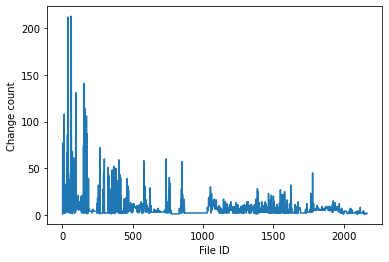

In [5]:
sns.lineplot(data=df_id, x="File ID", y="Change count")

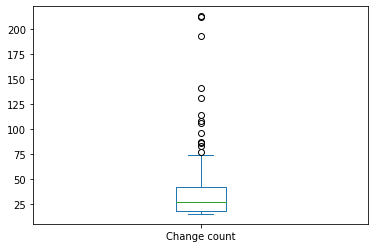

In [8]:
# Most changed files
df_id["Change count"].plot(kind="box")
df_id = df_id.loc[df_id["Change count"] >= df_id["Change count"].quantile(.75)]

In [9]:
pattern = re.compile("^lib/matplotlib/*")
df_files_lib = df_files[df_files["Filename"].str.contains(pattern)]
df_files_lib

,Filename,ID
2,lib/matplotlib/backends/backend_qt.py,3
7,lib/matplotlib/tests/test_ticker.py,8
8,lib/matplotlib/ticker.py,9
9,lib/matplotlib/ticker.pyi,10
15,lib/matplotlib/sphinxext/figmpl_directive.py,16
...,...,...
2145,lib/matplotlib/mpl-data/stylelib/_mpl-gallery....,2146
2148,lib/matplotlib/_api/deprecation.py,2149
2159,lib/matplotlib/_animation_data.py,2160
2160,lib/matplotlib/backends/web_backend/ipython_in...,2161


In [10]:
pattern = re.compile("^lib/matplotlib*")
df_id_files_lib = df_id[df_id["Filename"].str.contains(pattern)].reset_index(drop=True)
df_id_files_lib

,File ID,Change count,Filename
0,62,213,lib/matplotlib/axes/_axes.py
1,41,212,lib/matplotlib/figure.py
2,63,193,lib/matplotlib/tests/test_axes.py
3,154,141,lib/matplotlib/pyplot.py
4,95,131,lib/matplotlib/axes/_base.py
5,159,114,lib/matplotlib/widgets.py
6,96,96,lib/matplotlib/axis.py
7,176,87,lib/matplotlib/colorbar.py
8,42,83,lib/matplotlib/backend_bases.py
9,150,74,lib/matplotlib/patches.py


In [35]:
## Include additions and deletions ##
df_id_commits = df.groupby(["File ID"]).sum()
df_id_commits["Filename"] = df_files["Filename"]
df_id_add = df_id_commits.drop(columns=["Deletions"])
df_id_del = df_id_commits.drop(columns=["Additions"])
df_id_commits.head()

,Additions,Deletions,Filename
File ID,,,
1,15,27,.github/workflows/tests.yml
2,484,369,lib/matplotlib/backends/backend_qt.py
3,330,360,src/_tkagg.cpp
4,48,30,src/py_converters.cpp
5,24,112,doc/users/next_whats_new/multiplelocator_offse...


<AxesSubplot:>

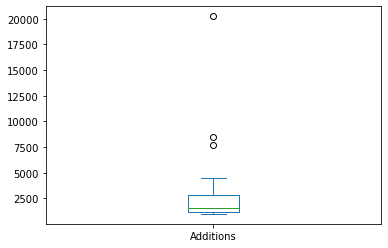

In [38]:
# Run 3 times
df_id_add = df_id_add.loc[df_id_add["Additions"] >= df_id_add["Additions"].quantile(.75)]
df_id_add.plot(kind="box")

In [40]:
df_id_add = df_id_add.sort_values("Additions").reset_index()
df_id_add

,File ID,Additions,Filename
0,291,996,lib/mpl_toolkits/axisartist/grid_helper_curvel...
1,2040,1005,doc/users/prev_whats_new/whats_new_3.5.2.rst
2,574,1021,doc/api/style_api.rst
3,133,1030,lib/matplotlib/tests/test_rcparams.py
4,2054,1042,lib/matplotlib/tests/baseline_images/test_back...
5,2096,1052,lib/matplotlib/tests/baseline_images/test_math...
6,104,1082,lib/matplotlib/backend_tools.pyi
7,95,1084,lib/matplotlib/axis.py
8,568,1119,doc/api/prev_api_changes/api_changes_3.6.1.rst
9,171,1234,lib/mpl_toolkits/mplot3d/tests/test_axes3d.py


In [42]:
pattern = re.compile("^lib/matplotlib/*")
df_add_lib = df_id_add[df_id_add["Filename"].str.contains(pattern)].reset_index(drop=True)
df_add_lib

,File ID,Additions,Filename
0,133,1030,lib/matplotlib/tests/test_rcparams.py
1,2054,1042,lib/matplotlib/tests/baseline_images/test_back...
2,2096,1052,lib/matplotlib/tests/baseline_images/test_math...
3,104,1082,lib/matplotlib/backend_tools.pyi
4,95,1084,lib/matplotlib/axis.py
5,150,1273,lib/matplotlib/tests/baseline_images/test_axes...
6,158,1434,lib/matplotlib/widgets.py
7,41,1505,lib/matplotlib/backend_bases.py
8,122,1630,lib/matplotlib/path.pyi
9,80,1846,lib/matplotlib/backends/backend_pdf.py


In [38]:
#### FILE ANALYSIS ####
df["File ID"].value_counts().describe()

count    2309.000000
mean        8.345171
std        16.821521
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       273.000000
Name: File ID, dtype: float64

In [187]:
#### FILE NAME ANALYSIS ####
df_file_a = df.groupby(["File ID"]).sum().reset_index()
df_file_a_vc = df["File ID"].value_counts().sort_index()
df_file_a["Changes"] = df_file_a_vc.values
df_file_a["Total"] = df_file_a["Additions"] + df_file_a["Deletions"] 
df_file_a["Deficit"] = df_file_a["Additions"] - df_file_a["Deletions"] 
df_file_a

,File ID,Additions,Deletions,Changes,Total,Deficit
0,1,976,457,154,1433,519
1,2,158,234,36,392,-76
2,3,15,27,1,42,-12
3,4,648,435,117,1083,213
4,5,641,560,63,1201,81
...,...,...,...,...,...,...
2304,2306,2,2,2,4,0
2305,2307,8,0,2,8,8
2306,2308,0,0,2,0,0
2307,2309,0,0,2,0,0


In [207]:
df_file_a["Filename"] = np.zeros(len(df_file_a["File ID"]))
df_file_a["File extension"] = np.zeros(len(df_file_a["File ID"]))
for index, value in enumerate(df_files["Filename"]):
    midd = df_file_a.loc[df_file_a["File ID"] == (index + 1)]
    df_file_a.loc[df_file_a["File ID"] == (index + 1), "Filename"], df_file_a.loc[df_file_a["File ID"] == (index + 1), "File extension"] = os.path.splitext(value) 

df_file_a

,File ID,Additions,Deletions,Changes,Total,Deficit,Filename,File extension
0,1,976,457,154,1433,519,doc/conf,.py
1,2,158,234,36,392,-76,lib/mpl_toolkits/axes_grid1/axes_grid,.py
2,3,15,27,1,42,-12,galleries/examples/text_labels_and_annotations...,.py
3,4,648,435,117,1083,213,.github/workflows/tests,.yml
4,5,641,560,63,1201,81,lib/matplotlib/backends/backend_qt,.py
...,...,...,...,...,...,...,...,...
2304,2306,2,2,2,4,0,lib/matplotlib/tests/test_type1font,.py
2305,2307,8,0,2,8,8,lib/matplotlib/testing/widgets,.py
2306,2308,0,0,2,0,0,lib/matplotlib/tests/baseline_images/test_axes...,.pdf
2307,2309,0,0,2,0,0,lib/matplotlib/tests/baseline_images/test_axes...,.png


In [233]:
# most added files
total = df_file_a.loc[df_file_a["Deficit"] >= 100]
total_lib = df_file_a.loc[(df_file_a["Deficit"] >= 100) & (df_file_a["Filename"].str.contains(r'^lib/|^doc/'))]
print(len(total_lib), len(total))

204 252


In [235]:
# most deleted files
total = df_file_a.loc[df_file_a["Deficit"] < 0]
total_lib = df_file_a.loc[(df_file_a["Deficit"] < 0) & (df_file_a["Filename"].str.contains(r'^lib/|^doc/'))]
print(len(total_lib), len(total))

428 629


In [236]:
# most changed files (total additions + deletions)
total = df_file_a.loc[df_file_a["Total"] > 1000]
total_lib = df_file_a.loc[(df_file_a["Total"] > 1000) & (df_file_a["Filename"].str.contains(r'^lib/|^doc/'))]
print(len(total_lib), len(total))

89 96


In [290]:
df_draw = df_file_a.copy()
df_draw["Folder"] = np.zeros(len(df_draw.index))
for index, value in enumerate(df_draw["Filename"]):
    df_draw.loc[df_draw["Filename"] == value, "Folder"] = value.split("/")[0]
df_draw = df_draw["Folder"].value_counts().rename_axis('Folder').reset_index(name='Counts')
df_draw.loc[df_draw["Counts"] < 100, "Folder"] = "Other"
df_draw = df_draw.groupby(["Folder"]).sum().reset_index()
df_draw

,Folder,Counts
0,Other,143
1,doc,559
2,examples,505
3,galleries,391
4,lib,711


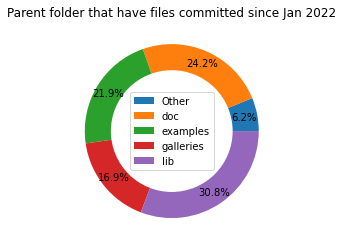

In [293]:
plt.pie(df_draw["Counts"], autopct='%1.1f%%', pctdistance=0.85,)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Parent folder that have files committed since Jan 2022')
 
# Add Legends
plt.legend(df_draw["Folder"], loc="center")

In [300]:
df_draw = df_file_a.copy()
df_draw["Folder"] = np.zeros(len(df_draw.index))
for index, value in enumerate(df_draw["Filename"]):
    df_draw.loc[df_draw["Filename"] == value, "Folder"] = value.split("/")[0]
df_draw = df_draw.groupby(["Folder"]).sum().reset_index()
df_draw.loc[df_draw["Changes"] < 500, "Folder"] = "Other"
df_draw = df_draw.groupby(["Folder"]).sum().reset_index()
df_draw

,Folder,File ID,Additions,Deletions,Changes,Total,Deficit
0,Other,157532,17927,17888,1921,35815,39
1,doc,716351,69742,37907,4246,107649,31835
2,examples,689422,14972,14033,3043,29005,939
3,galleries,300539,2248,1845,954,4093,403
4,lib,803121,164058,86074,9105,250132,77984


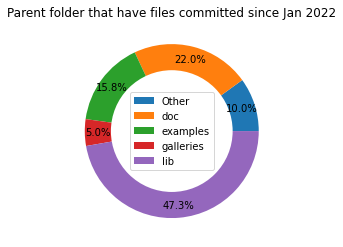

In [301]:
plt.pie(df_draw["Changes"], autopct='%1.1f%%', pctdistance=0.85,)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Parent folder that have files committed since Jan 2022')
 
# Add Legends
plt.legend(df_draw["Folder"], loc="center")

In [79]:
#### FILE ANALYSIS WITH TIME ####
df["Commit date"] = pd.to_datetime(df["Commit time"]).dt.date
df_time = df.groupby(["Commit date"]).sum()
df_time["Changes"] = df["Commit date"].value_counts()
df_time["Total"] = df_time["Additions"] + df_time["Deletions"]
df_time["Deficit"] = df_time["Additions"] - df_time["Deletions"]
df_time = df_time.reset_index()

In [81]:
df_time_melt = df_time.melt(id_vars=["Commit date"], value_vars=["Additions", "Deletions", "Total", "Deficit", "Changes"])
df_time_melt

,Commit date,variable,value
0,2022-01-03,Additions,34
1,2022-01-04,Additions,67
2,2022-01-05,Additions,43
3,2022-01-07,Additions,124
4,2022-01-08,Additions,455
...,...,...,...
2535,2023-05-30,Changes,13
2536,2023-05-31,Changes,11
2537,2023-06-01,Changes,29
2538,2023-06-02,Changes,23


<AxesSubplot:xlabel='Commit date', ylabel='value'>

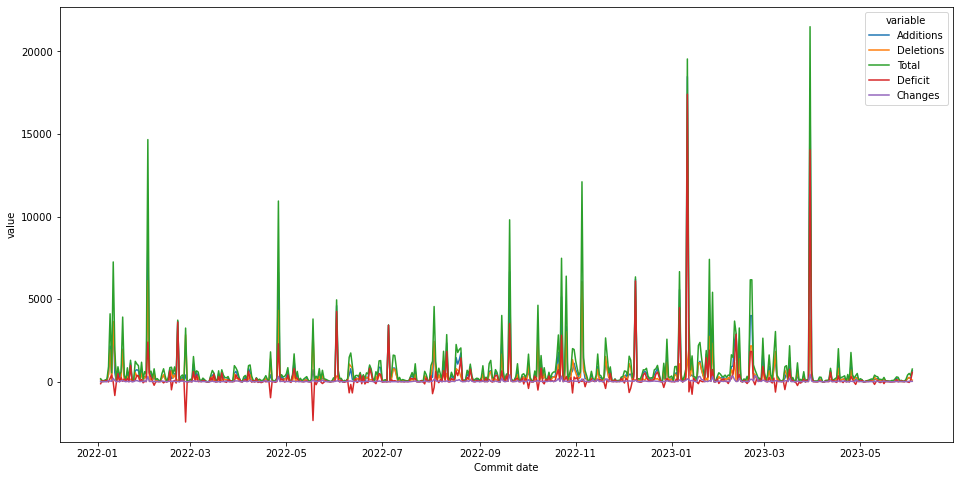

In [93]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=df_time_melt, x="Commit date", y="value", hue="variable")

In [145]:
df_time_month = df
df_time_month["Month"] = pd.to_datetime(df['Commit time']).dt.strftime('%Y-%B')
df_time_month = df_time_month.drop(columns=["File ID", "ID", "Message", "Email", "Author", "Commit time"])
df_time_month = df_time_month.sort_values("Commit date")
df_time_month = df_time_month.loc[df_time_month["Month"] != "2023-June"]

In [146]:
df_time_month_agg = df.groupby(["Commit time"]).sum().reset_index()
df_time_month_agg["Month"] = pd.to_datetime(df_time_month_agg['Commit time']).dt.strftime('%Y-%B')
df_time_month_agg = df_time_month_agg.drop(columns=["File ID"])
df_time_month_agg = df_time_month_agg.sort_values("Commit time")
df_time_month_agg = df_time_month_agg.loc[df_time_month_agg["Month"] != "2023-June"]

Text(0.5, 1.0, 'Total file changes of Matplotlib from Jan 2022 to May 2023')

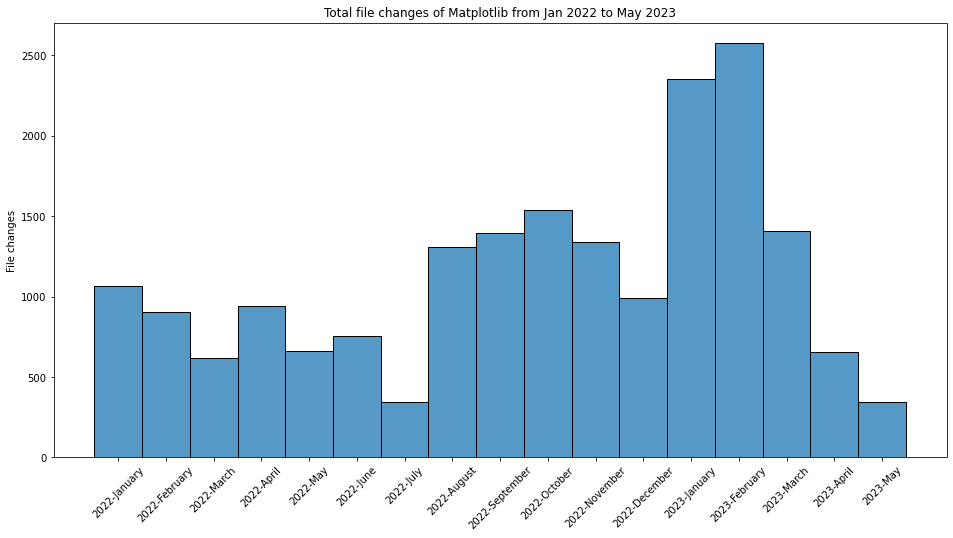

In [149]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=df_time_month, x="Month")
plt.xticks(rotation=45)
ax.set_ylabel("File changes")
ax.set_xlabel("")
ax.set_title("Total file changes of Matplotlib from Jan 2022 to May 2023")

Text(0.5, 1.0, 'Total commits of Matplotlib from Jan 2022 to May 2023')

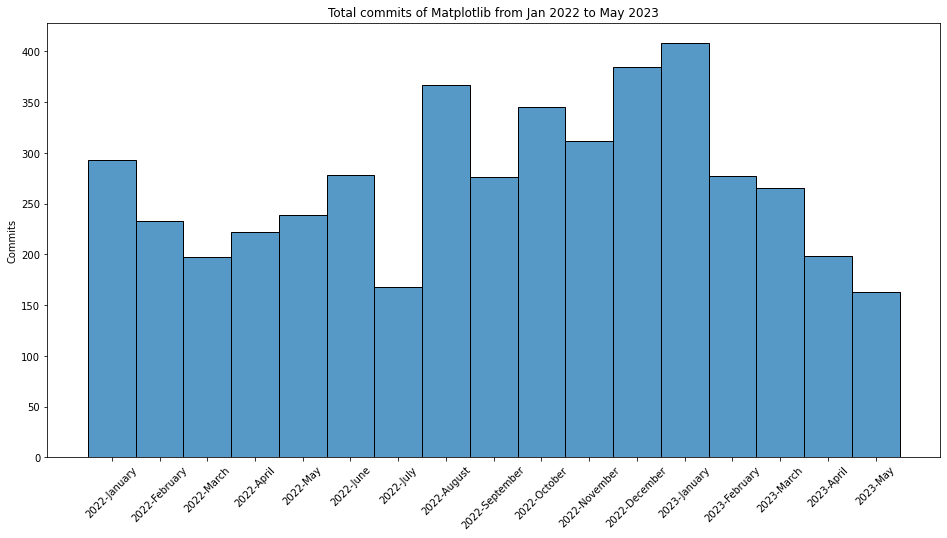

In [150]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=df_time_month_agg, x="Month")
plt.xticks(rotation=45)
ax.set_ylabel("Commits")
ax.set_xlabel("")
ax.set_title("Total commits of Matplotlib from Jan 2022 to May 2023")

In [270]:
df["Commit hour"] = pd.to_datetime(df["Commit time"]).dt.hour
df_hour = df.drop(columns=["File ID", "ID", "Message", "Email", "Author", "Commit time", "Commit date", "Month"])
df_hour = df_hour["Commit hour"].value_counts().rename_axis('Commit hour').reset_index(name='Count').sort_values("Commit hour")
df_hour.set_index("Commit hour", inplace=True)
df_hour

,Count
Commit hour,
0,1072
1,478
2,742
3,364
4,573
5,347
6,369
7,484
8,642


Text(0.5, 1.0, 'Commit heat map by hour')

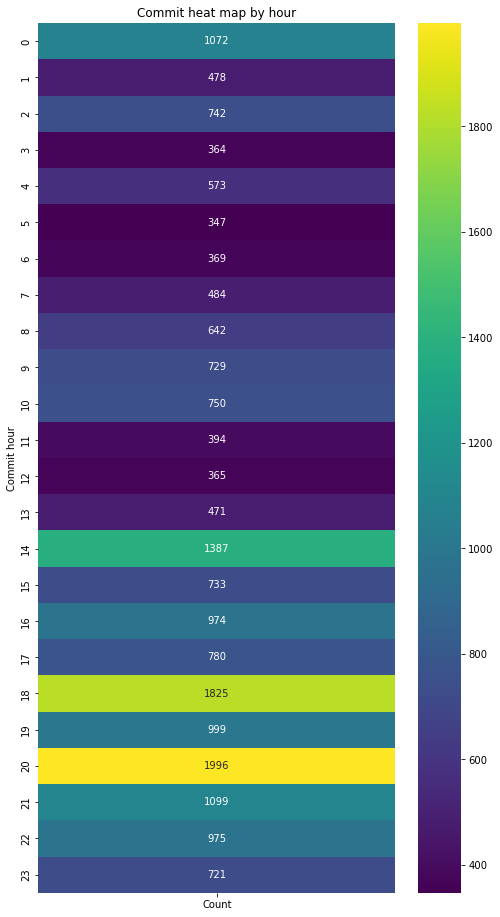

In [273]:
fig, ax = plt.subplots(figsize=(8, 16))
sns.heatmap(data=df_hour, annot=True, fmt="g", cmap='viridis')
ax.set_title("Commit heat map by hour")

In [ ]:
#### AUTHOR ANALYSIS ####
df["Author"].value_counts().describe()

In [9]:
df.groupby(["Author", "Commit time"])["Author"].value_counts().describe()

count    4674.000000
mean        4.122593
std        16.868487
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       300.000000
Name: Author, dtype: float64

In [9]:
df_auth = df.groupby(["Author"]).sum().drop(columns=["File ID"]).reset_index()
df_auth_vc = df["Author"].value_counts().sort_index()
df_auth["Changes"] = df_auth_vc.values
df_auth["Total"] = df_auth["Additions"] + df_auth["Deletions"] 
df_auth

,Author,Additions,Deletions,Changes,Total
0,Aalok Chhetri,4,3,4,7
1,Abhijnan Bajpai,16,27,4,43
2,Abhishek K M,15,16,6,31
3,Adam J. Stewart,2,2,1,4
4,Adrien F. Vincent,69,5,3,74
...,...,...,...,...,...
227,yuanx749,3,3,3,6
228,yuzie007,8,2,2,10
229,zhizheng1,15,3,2,18
230,مهدي شينون (Mehdi Chinoune),4,4,2,8


In [22]:
print(df_auth.sort_values("Total", ascending=False)["Total"].head(7).sum() / df_auth["Total"].sum())
df_auth.sort_values("Total", ascending=False).head(7)

0.7386159636648277


,Author,Additions,Deletions,Changes,Total
46,Elliott Sales de Andrade,62330,27970,3433,90300
161,Thomas A Caswell,37732,16468,2473,54200
89,Kyle Sunden,30501,12299,1606,42800
123,Oscar Gustafsson,21636,17694,2184,39330
76,Jody Klymak,20588,10998,1314,31586
164,Tim Hoffmann,16383,14235,2071,30618
18,Antony Lee,12940,13389,1249,26329


In [24]:
print(df_auth.sort_values("Changes", ascending=False)["Changes"].head(7).sum() / df_auth["Changes"].sum())
df_auth.sort_values("Changes", ascending=False).head(7)

0.7436815610566194


,Author,Additions,Deletions,Changes,Total
46,Elliott Sales de Andrade,62330,27970,3433,90300
161,Thomas A Caswell,37732,16468,2473,54200
123,Oscar Gustafsson,21636,17694,2184,39330
164,Tim Hoffmann,16383,14235,2071,30618
89,Kyle Sunden,30501,12299,1606,42800
76,Jody Klymak,20588,10998,1314,31586
18,Antony Lee,12940,13389,1249,26329


In [25]:
df_auth.sort_values("Changes", ascending=False)["Author"].head(7)

46     Elliott Sales de Andrade
161            Thomas A Caswell
123            Oscar Gustafsson
164                Tim Hoffmann
89                  Kyle Sunden
76                  Jody Klymak
18                   Antony Lee
Name: Author, dtype: object

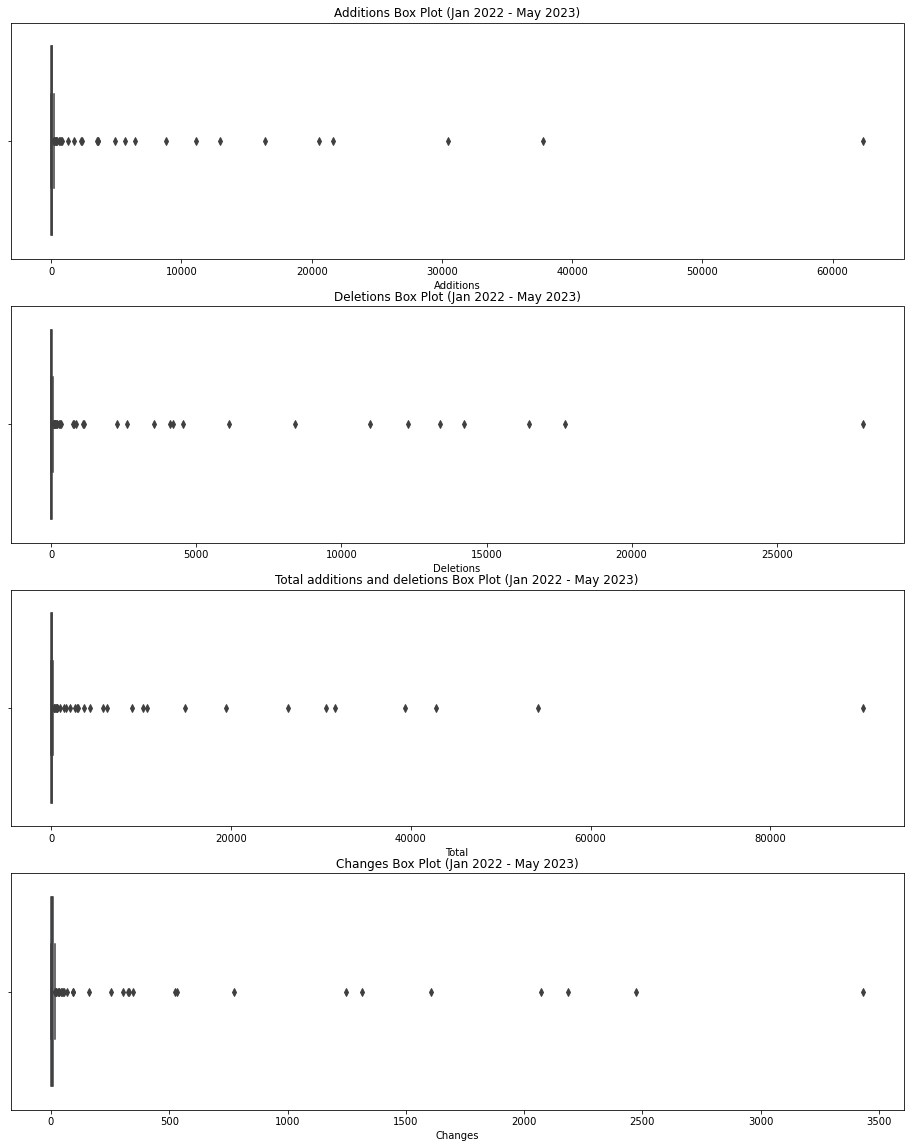

In [34]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))
#yearly
sns.boxplot(data=df_auth, x="Additions", ax=axes[0])
axes[0].set_title("Additions Box Plot (Jan 2022 - May 2023)")
axes[0].set_xlabel("Additions")
#monthly
sns.boxplot(data=df_auth, x="Deletions", ax=axes[1])
axes[1].set_title("Deletions Box Plot (Jan 2022 - May 2023)")
axes[1].set_xlabel("Deletions")
#monthly
sns.boxplot(data=df_auth, x="Total", ax=axes[2])
axes[2].set_title("Total additions and deletions Box Plot (Jan 2022 - May 2023)")
axes[2].set_xlabel("Total")
#monthly
sns.boxplot(data=df_auth, x="Changes", ax=axes[3])
axes[3].set_title("Changes Box Plot (Jan 2022 - May 2023)")
axes[3].set_xlabel("Changes")

fig.savefig("author_analysis.png")

Text(0.5, 1.0, 'Matplotlib total file additions/deletions by author from Jan 2022 to Jun 2023')

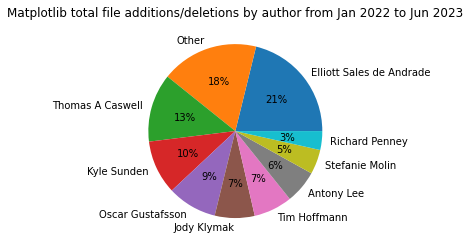

In [182]:
df_auth_draw = df_auth.copy()
df_auth_draw.loc[df_auth_draw['Total'] < 14000, 'Author'] = 'Other'

df_auth_draw = df_auth_draw.groupby('Author')['Total'].sum().reset_index().sort_values("Total", ascending=False)

plt.pie(df_auth_draw['Total'], labels=df_auth_draw['Author'], autopct='%.0f%%')
plt.title("Matplotlib total file additions/deletions by author from Jan 2022 to Jun 2023")

Text(0.5, 1.0, 'Matplotlib total file changes by author from Jan 2022 to Jun 2023')

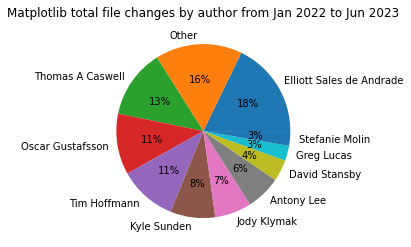

In [186]:
df_auth_draw = df_auth.copy()
df_auth_draw.loc[df_auth_draw['Changes'] < 500, 'Author'] = 'Other'

df_auth_draw = df_auth_draw.groupby('Author')['Changes'].sum().reset_index().sort_values("Changes", ascending=False)

plt.pie(df_auth_draw['Changes'], labels=df_auth_draw['Author'], autopct='%.0f%%')
plt.title("Matplotlib total file changes by author from Jan 2022 to Jun 2023")